# Unsupervised Learning: Heart Disease Conditions


## Problem Statement

### Context

 Cleveland heart disease dataset typically revolves around prediction of heart disease conditions presence in patients based on various medical attributes. The objective is to build a predictive model that can assist healthcare professionals in diagnosing heart disease more accurately and efficiently


### Objective

To develop an unsupervised machine learning model that accurately predicts the presence of heart disease conditions in patients based on their medical attributes. The goal is to assist healthcare professionals in early diagnosis and intervention, potentially improving patient outcomes and reducing healthcare costs.

### Background
Heart disease is a leading cause of death globally. Early detection and accurate diagnosis are crucial for effective treatment and management. The Cleveland heart disease dataset provides various patient attributes, such as age, sex, cholesterol levels, and more, which can be used to predict the presence of heart disease.

### Data Dictionary

- age: Age in years
- sex: Sex (1 = male; 0 = female)
- cp: Chest pain type
  
      1: typical angina
      2: atypical angina
      3: non-anginal pain
      4: asymptomatic
  
- trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
- chol: Serum cholesterol in mg/dl
- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: Resting electrocardiographic results
  
           0: normal
           1: having ST-T wave abnormality (T wave inversions and/or ST
              elevation or depression of > 0.05 mV)
           2: showing probable or definite left ventricular hypertrophy by
              Estes' criteria
  
- thalach: Maximum heart rate achieved
- exang: Exercise-induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment
  
         1: upsloping
         2: flat
         3: downsloping
  
- ca: Number of major vessels (0-3) colored by fluoroscopy
- thal: Thalassemia
  
        3: normal
        6: fixed defect
        7: reversible defect
  
- num: Diagnosis of heart disease (angiographic disease status)
  
       0: no presence
       1: first degree presence
       2: second degree presence
       3: third degree presence
       4: fourth degree presence
  

## Importing necessary libraries

In [1]:
#!pip3 install -U ucimlrepo

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")
from ucimlrepo import fetch_ucirepo, list_available_datasets
import requests
import zipfile
import io

In [3]:
# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

## Loading the dataset

In [4]:
# import dataset
data = fetch_ucirepo(id=45)

In [5]:
print(data)

{'data': {'ids': None, 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1   

In [6]:
url = "http://archive.ics.uci.edu/static/public/45/heart+disease.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall()
file_name = "processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

data = pd.read_csv(file_name, names=column_names)

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [7]:
data.shape

(303, 14)

In [8]:
print(f"There are {'303'} rows and {'14'} columns.")

There are 303 rows and 14 columns.


### Displaying few rows of the dataset

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert relevant columns to numeric
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

# Convert other columns to numeric where possible
for column in data.columns:
    if column != 'num':
        data[column] = pd.to_numeric(data[column], errors='coerce')

### Checking the data types of the columns for the dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


- The dataset is made up of float and integer data types.
- The memory occupied by the dataset is 33.3 Kilobytes.

### Creating a copy of original data

In [13]:
df = data.copy()

In [14]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

### Checking for duplicates and missing values

In [15]:
df.duplicated().sum()

0

- There are no duplicate observations.

In [16]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

- There are 4 missing observations in the **ca** column and 2 observations in the **thal** column.

## Treating Missing Values with Median

In [17]:
cols_impute = [
    "ca",
    "thal",
]

for col in cols_impute:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

- There are no missing values in our data

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Exploratory Data Analysis

### Univariate analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

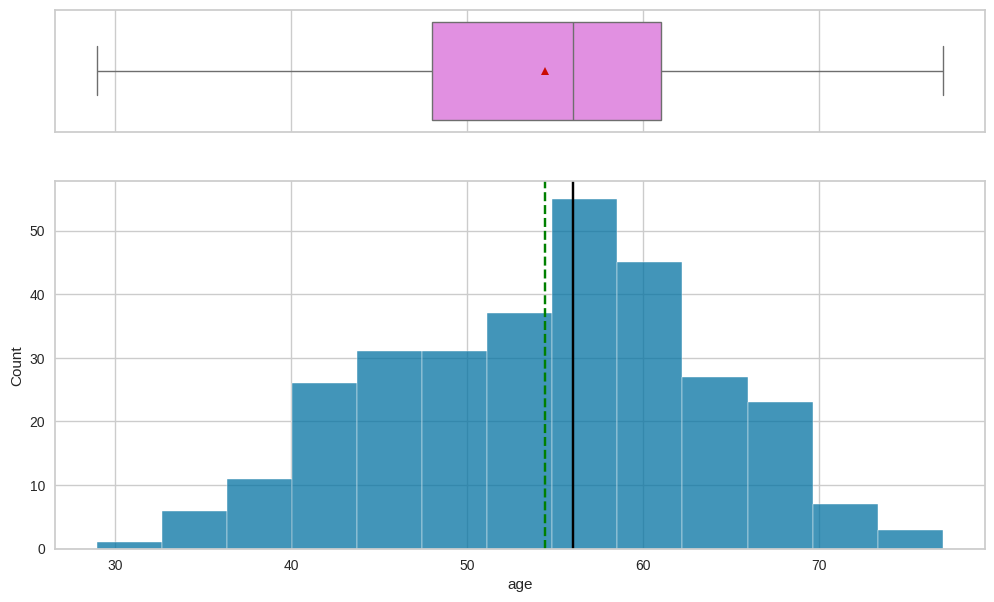

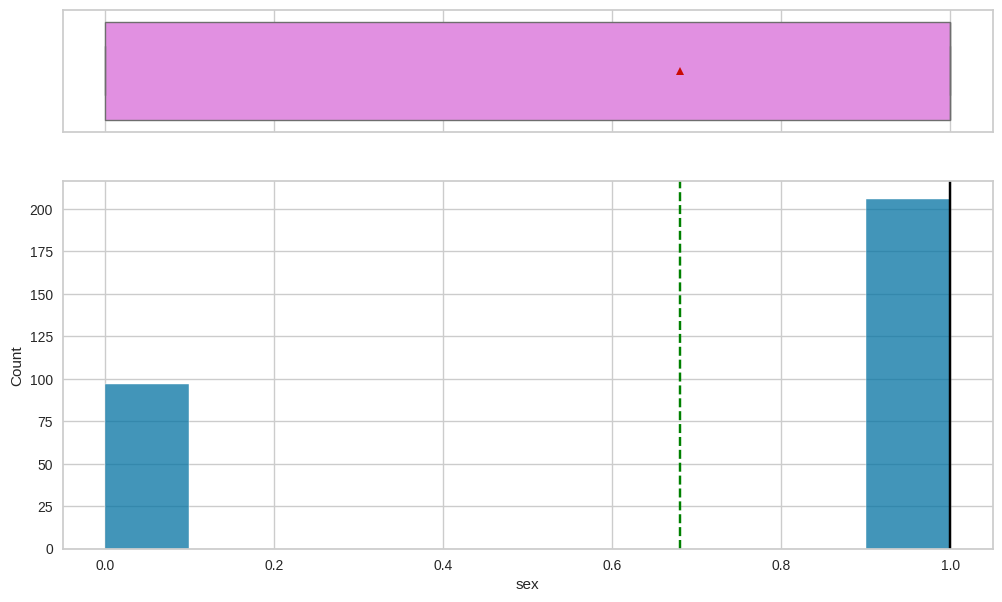

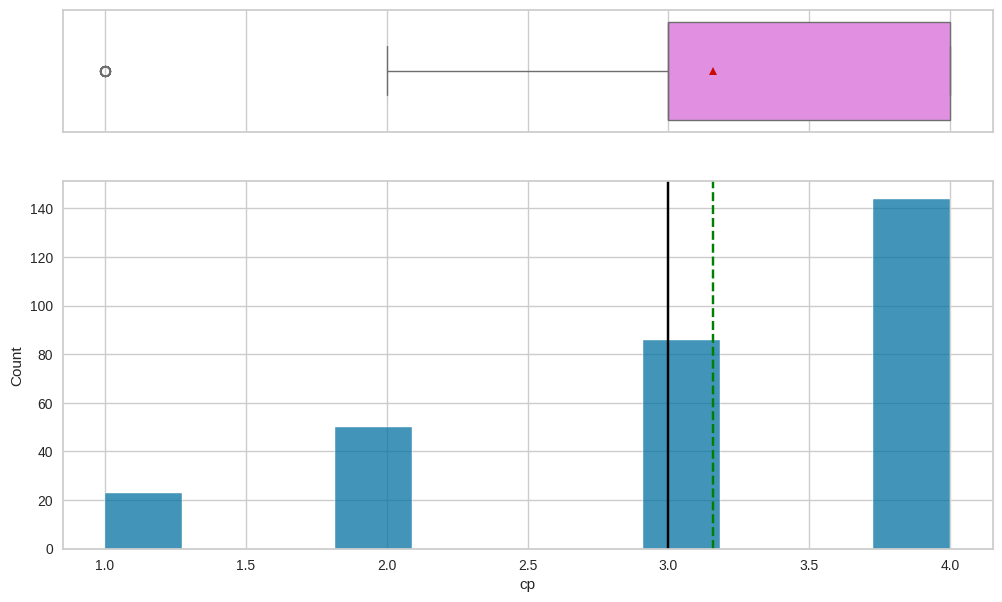

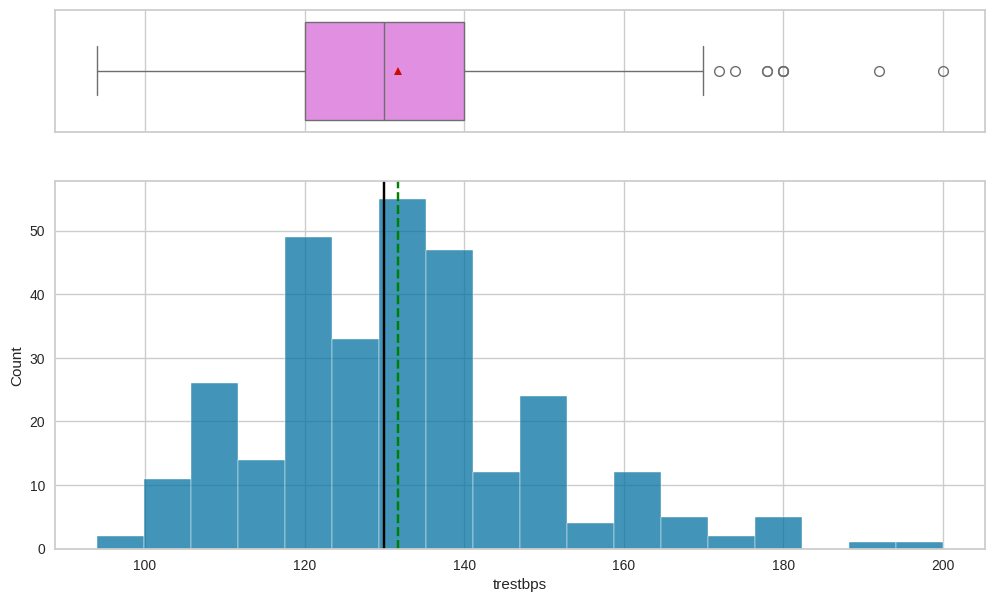

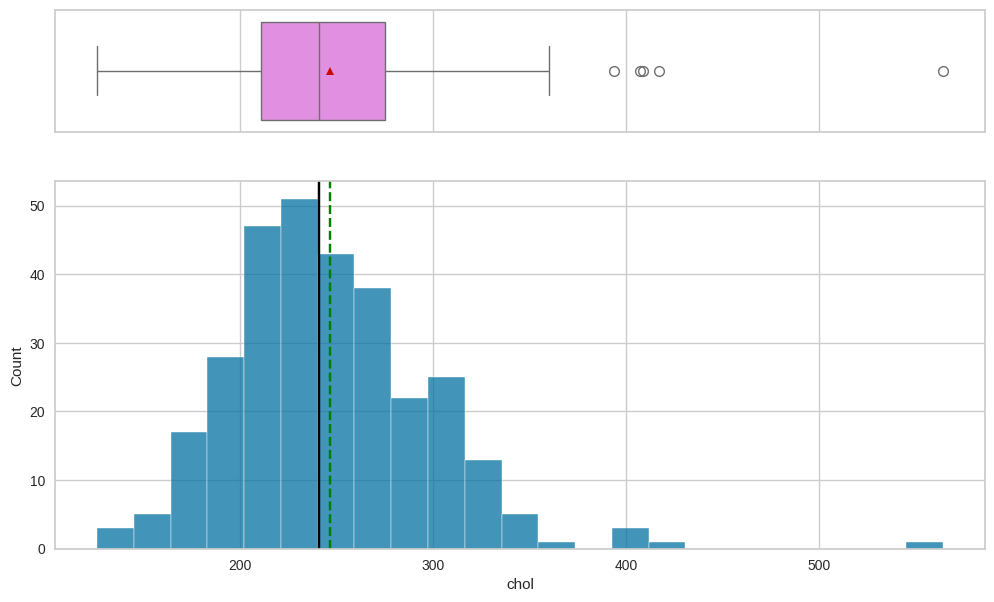

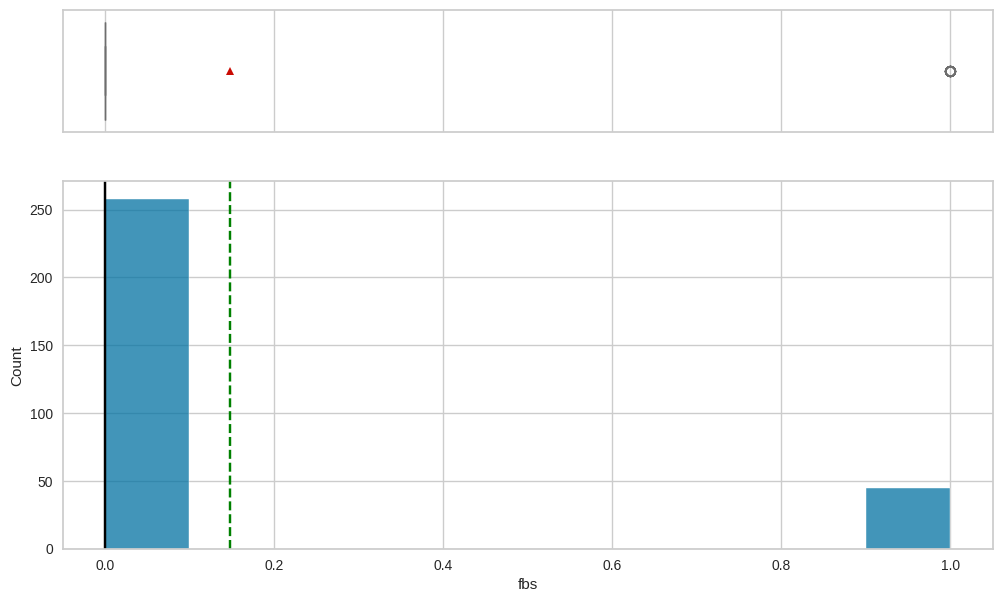

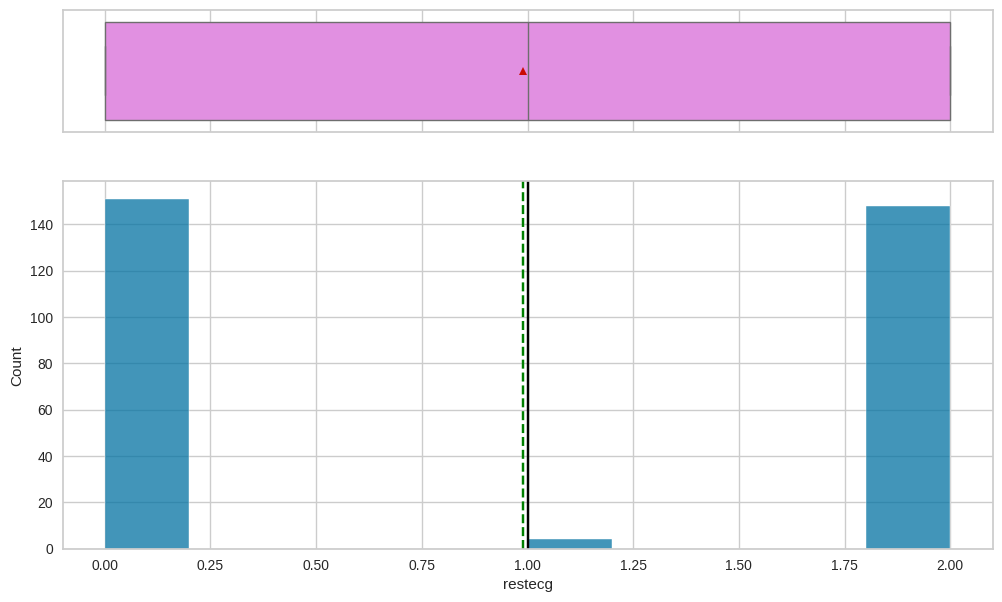

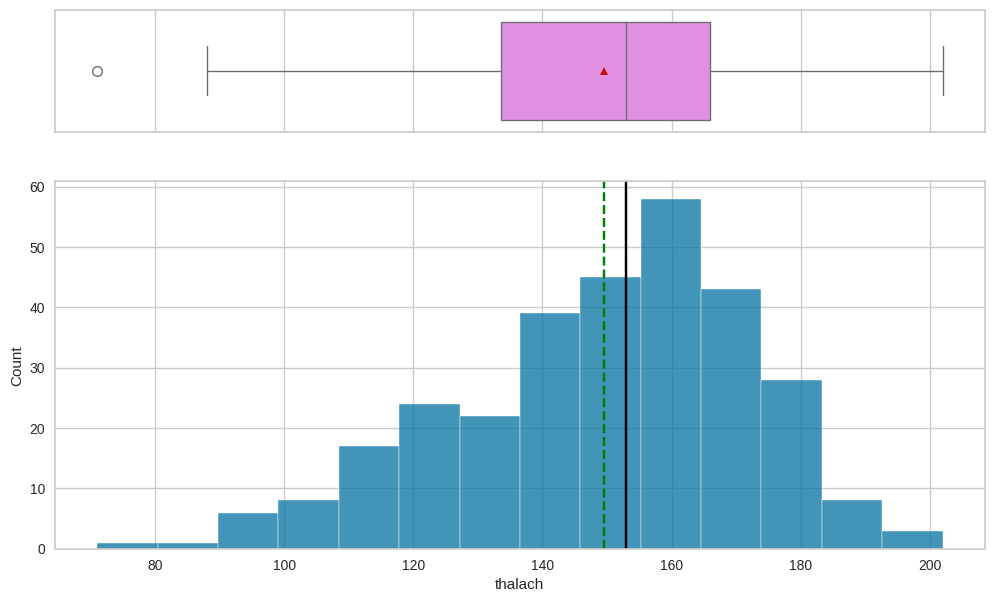

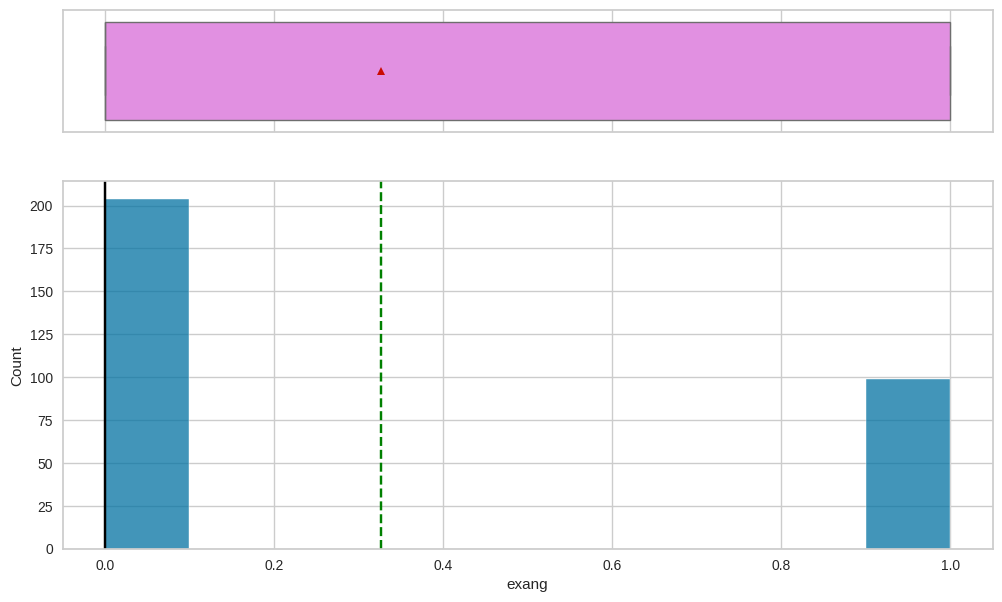

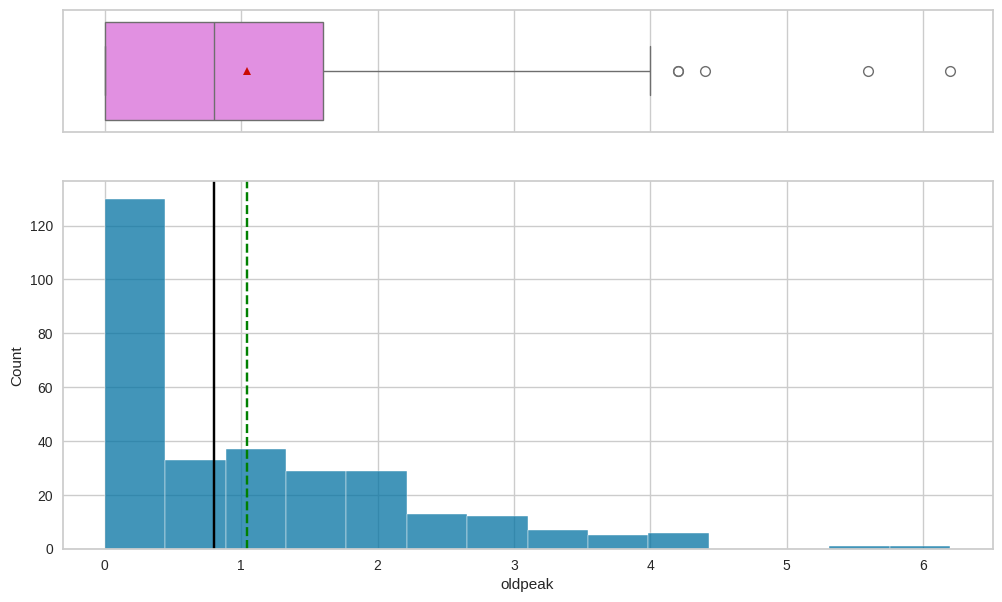

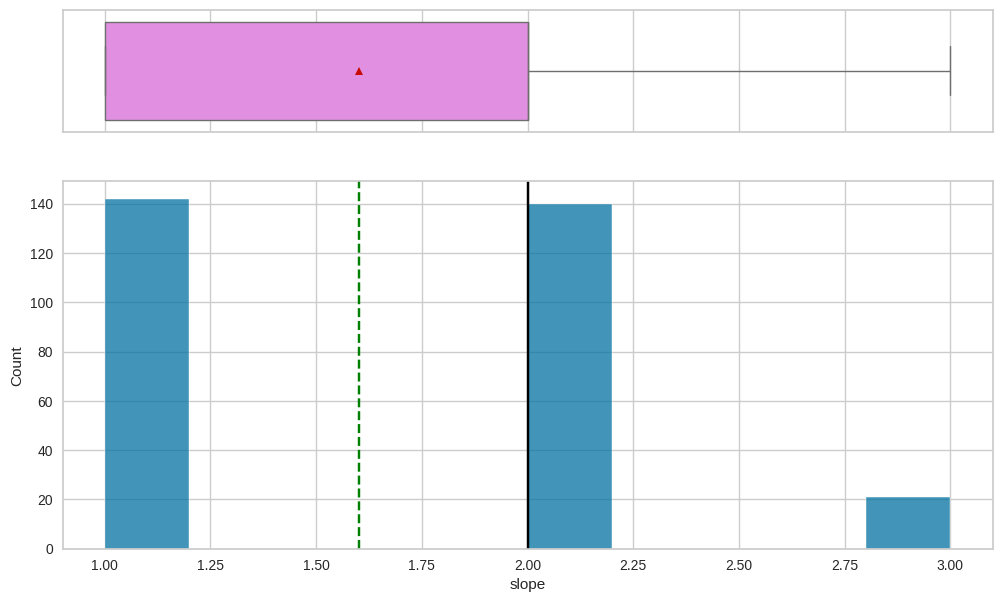

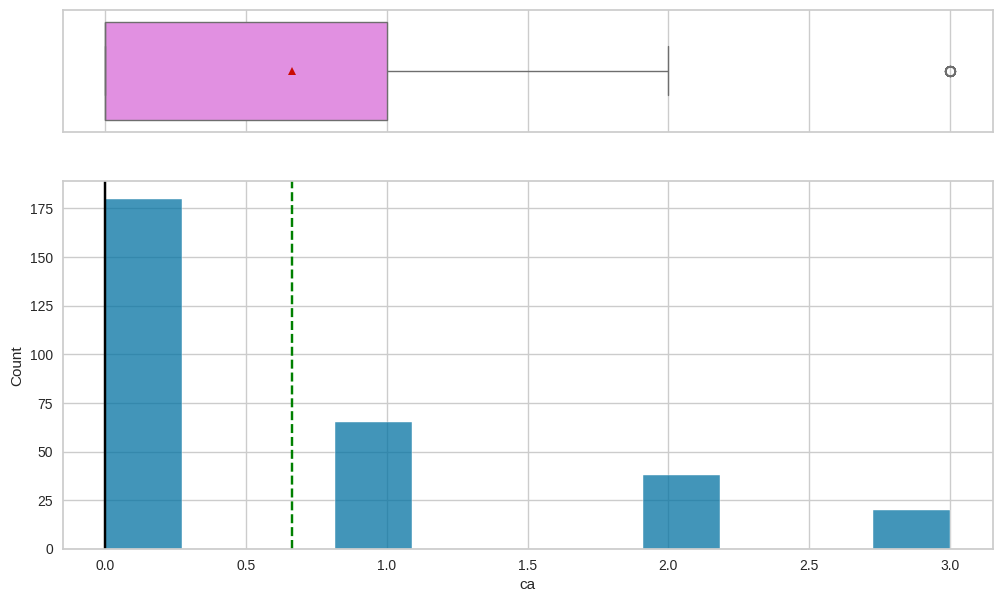

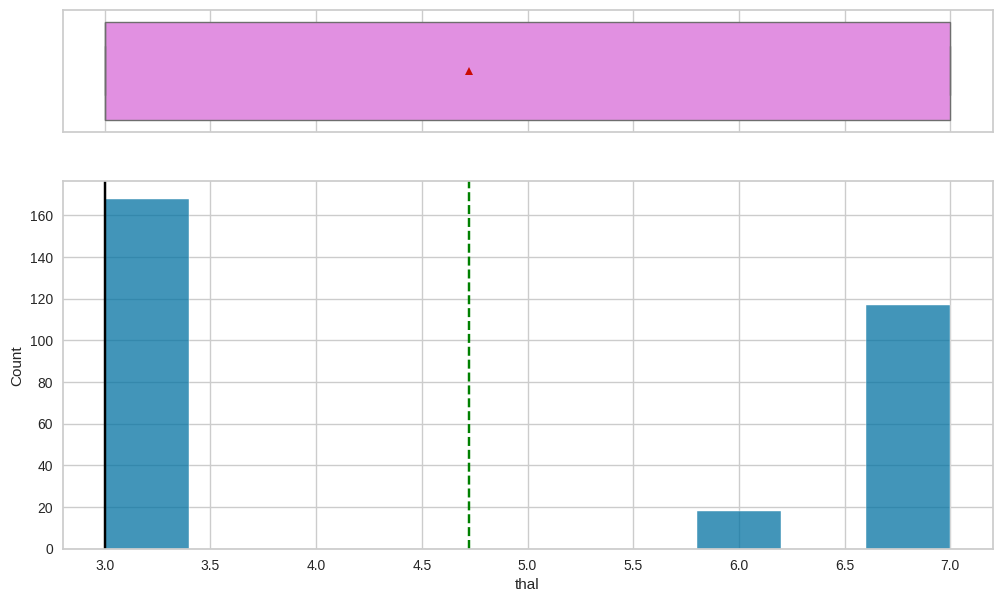

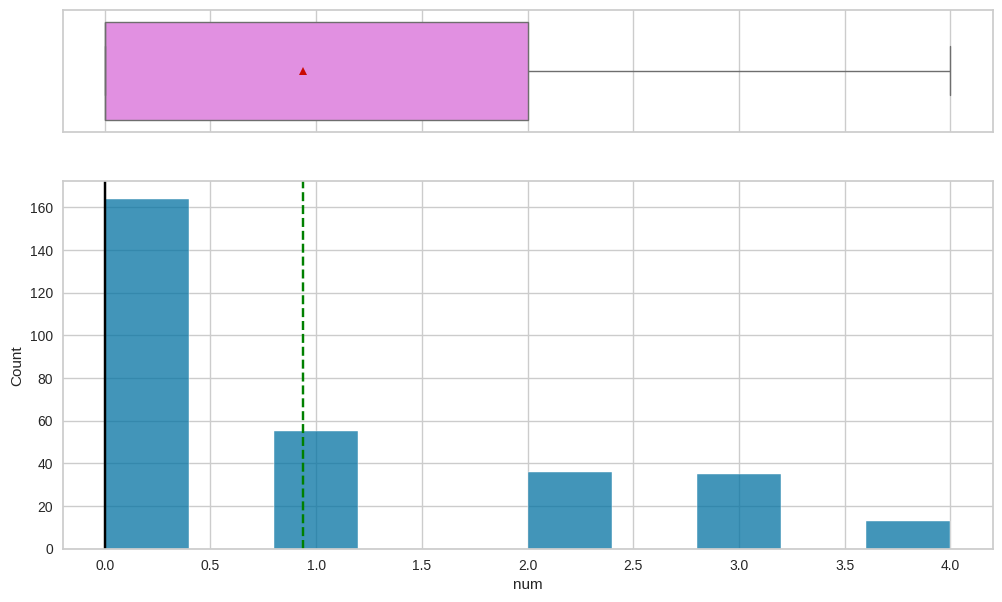

In [20]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observations**

- trestbps, thal, fbs, chol, cp, exang and oldpeak have right-skewed distributions with some having outliers on the upper or lower side, which indicates its highest effect in the diagnosis of heart disease.
- Age,sex, restecg, slope and ca have left-skewed distributions with some having outliers both on upper and lower ends, which indicates its lowest effect in the diagnosis of heart disease.

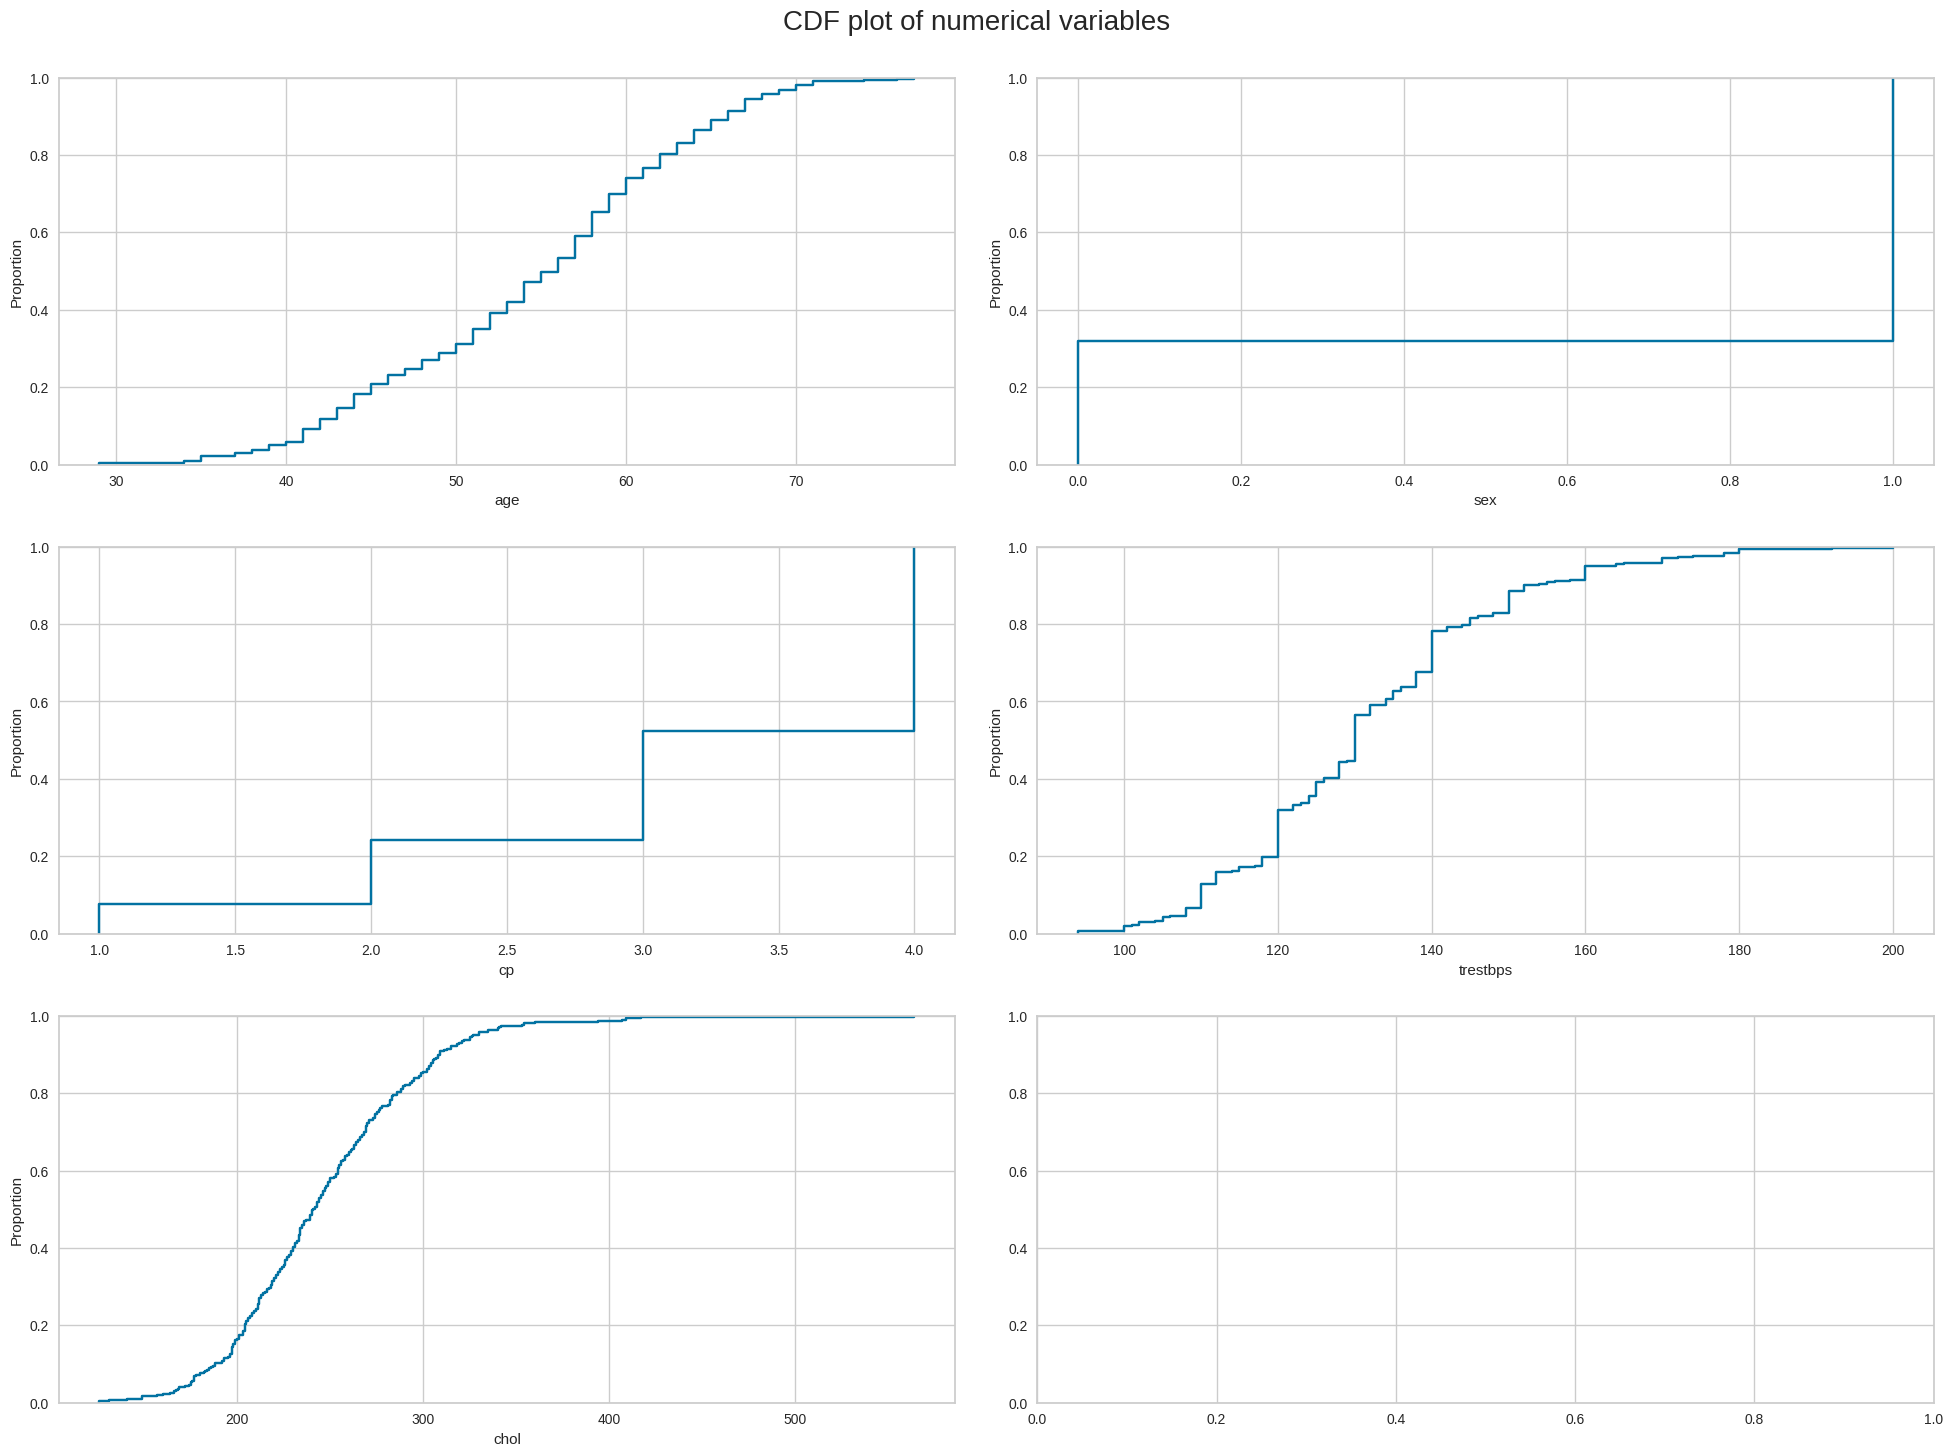

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**

- 98% of the population have age of less than 70.
- 55% of the propotion have a cp of less than 4.0.
- 98% of the propotion have a trestbps of less than 180.
- 98% of the propotion have chol of less than 400.

### Bivariate Analysis

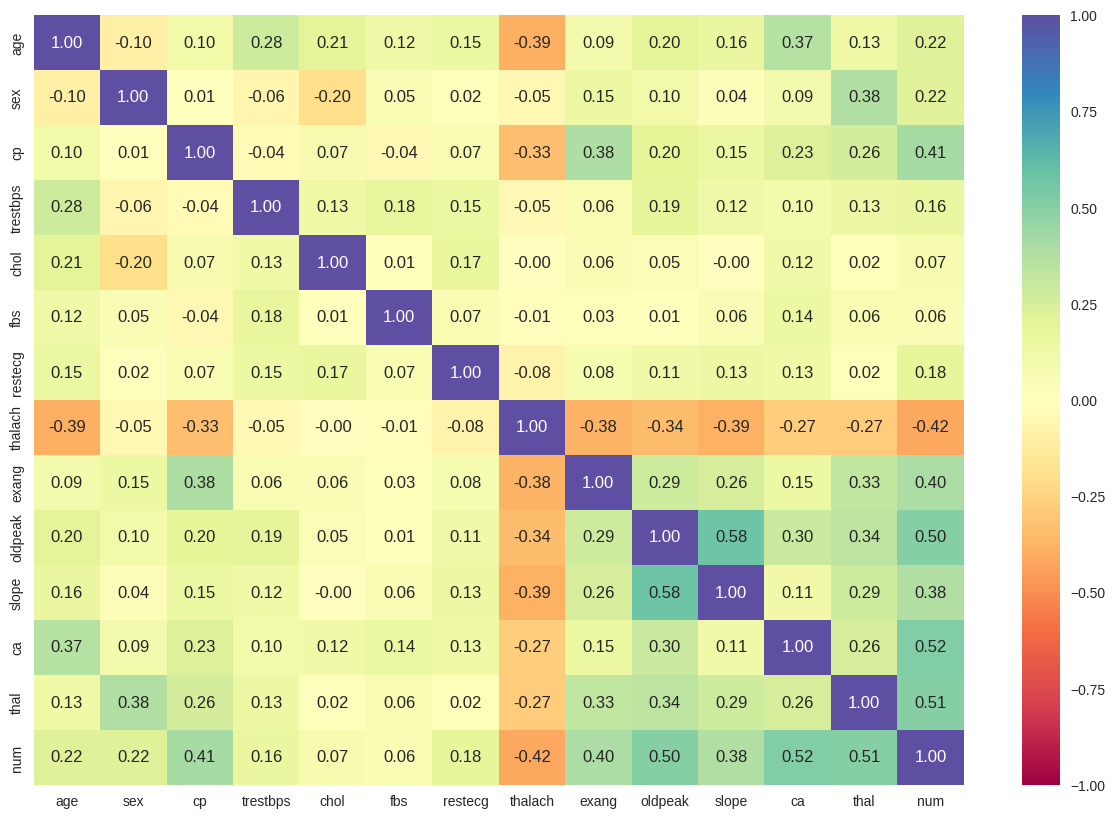

In [22]:
# Selecting only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Plotting the heatmap with the correlation matrix of the numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(),vmin=-1, vmax=1, annot=True, fmt='.2f',cmap="Spectral")
plt.show()

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

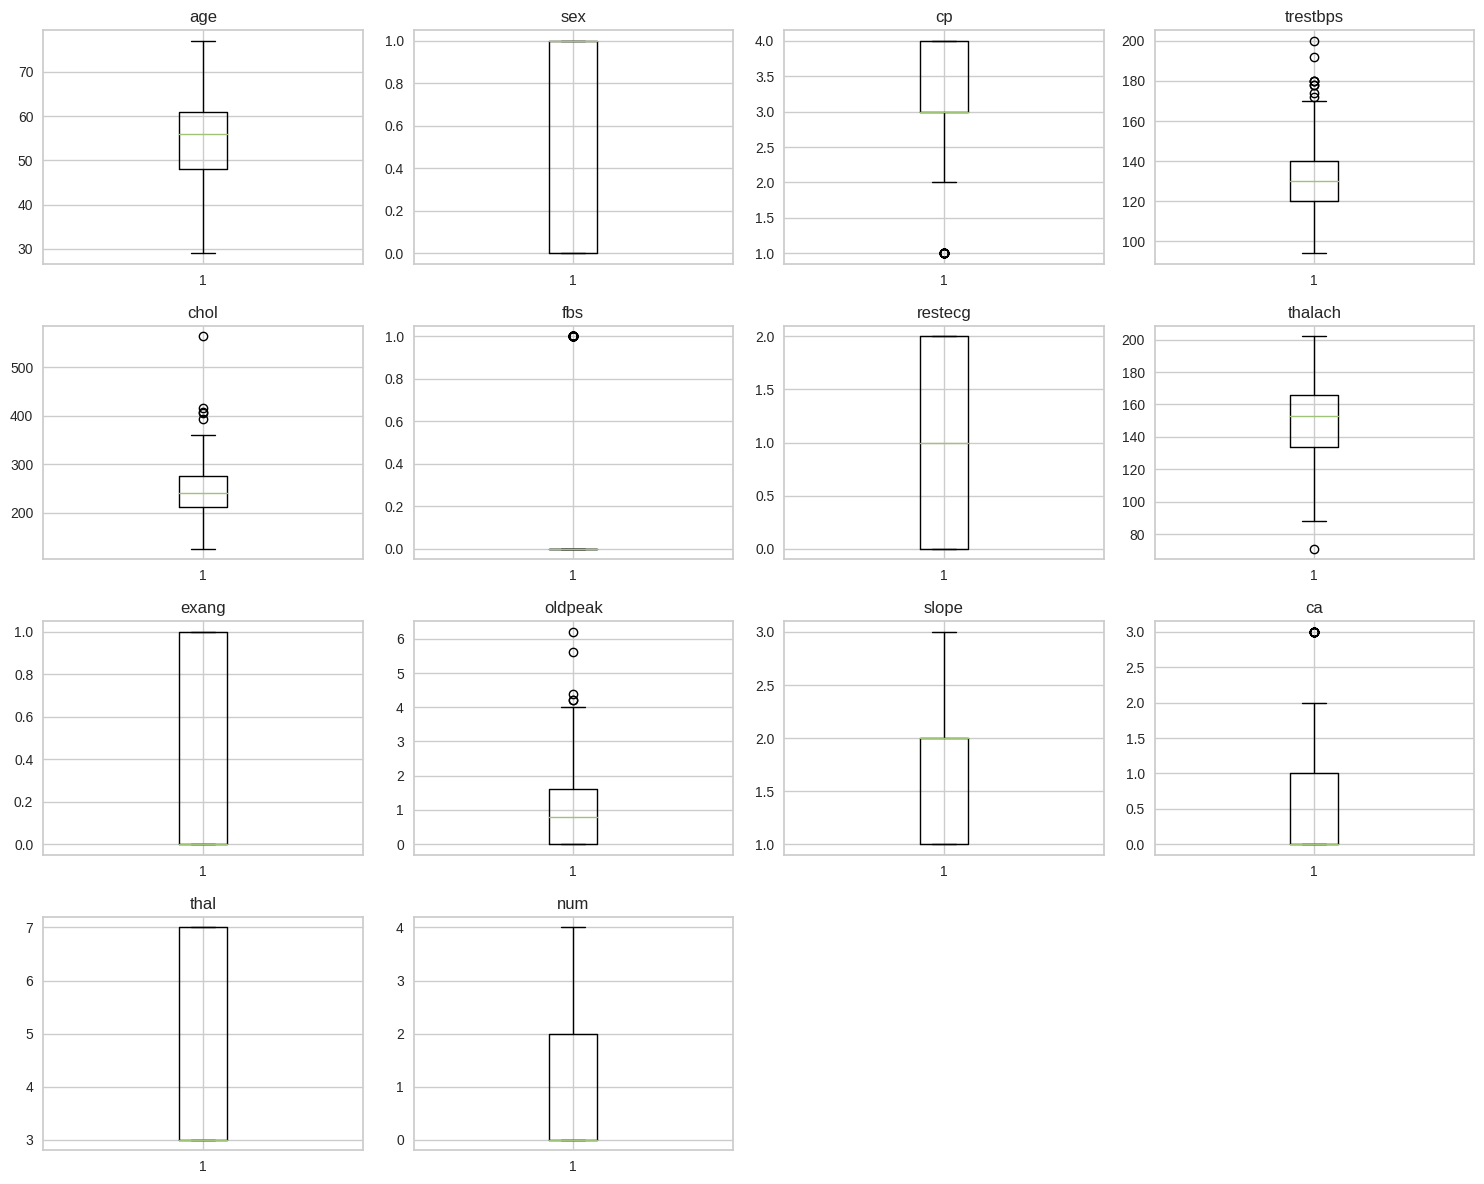

In [23]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

In [24]:
# variables used for clustering
num_col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [25]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [26]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [27]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 3.6654869690030374
Number of Clusters: 2 	Average Distortion: 3.2609114970115156
Number of Clusters: 3 	Average Distortion: 3.117821510089129
Number of Clusters: 4 	Average Distortion: 3.022300987552763
Number of Clusters: 5 	Average Distortion: 2.9433208864791296
Number of Clusters: 6 	Average Distortion: 2.8807597478315223
Number of Clusters: 7 	Average Distortion: 2.8174862511492575
Number of Clusters: 8 	Average Distortion: 2.7914383951395436
Number of Clusters: 9 	Average Distortion: 2.7318164837908707
Number of Clusters: 10 	Average Distortion: 2.681382311319454
Number of Clusters: 11 	Average Distortion: 2.6489297819854345
Number of Clusters: 12 	Average Distortion: 2.6287538870622114
Number of Clusters: 13 	Average Distortion: 2.5879787560073506
Number of Clusters: 14 	Average Distortion: 2.5609939223699967


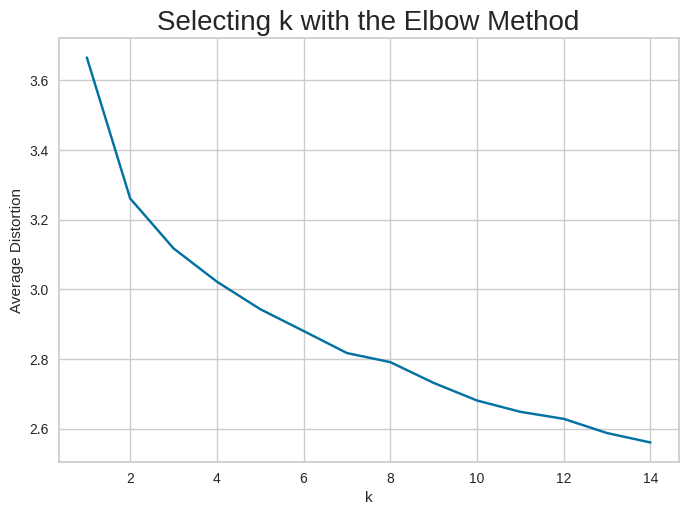

In [28]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Appropriate value for k seems to be 2.**

#### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.20169687587568932)
For n_clusters = 3, the silhouette score is 0.132906337949351)
For n_clusters = 4, the silhouette score is 0.13256697602886128)
For n_clusters = 5, the silhouette score is 0.11025763806759578)
For n_clusters = 6, the silhouette score is 0.10885311368725234)
For n_clusters = 7, the silhouette score is 0.10582979446294202)
For n_clusters = 8, the silhouette score is 0.09955228016335034)
For n_clusters = 9, the silhouette score is 0.10354688397111612)
For n_clusters = 10, the silhouette score is 0.0861990396265949)
For n_clusters = 11, the silhouette score is 0.0952542599658973)
For n_clusters = 12, the silhouette score is 0.09434582688489403)
For n_clusters = 13, the silhouette score is 0.1011845046601061)
For n_clusters = 14, the silhouette score is 0.10526545855073355)
For n_clusters = 15, the silhouette score is 0.10998900706741274)


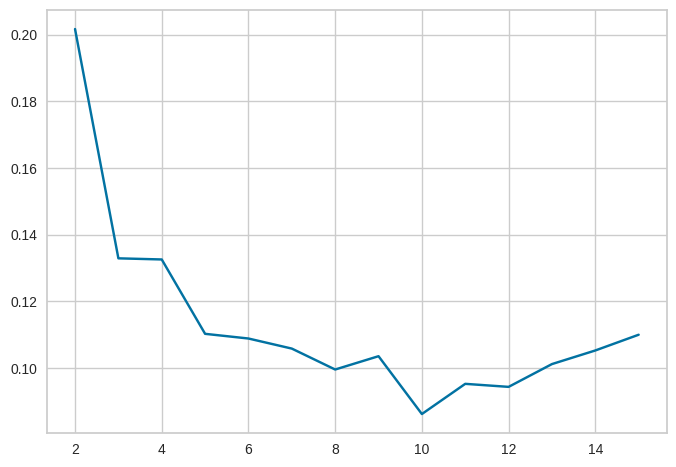

In [29]:
sil_score = []
cluster_list = list(range(2, 16))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score for 2 is the highest. So, we will choose 2 as value of k.**

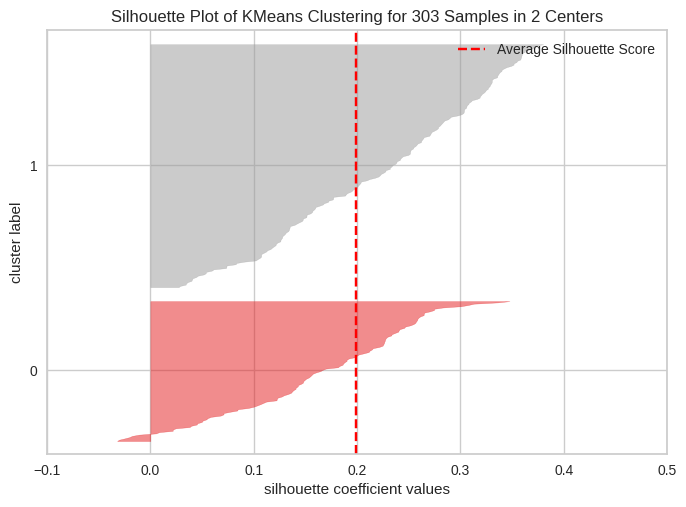

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 303 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

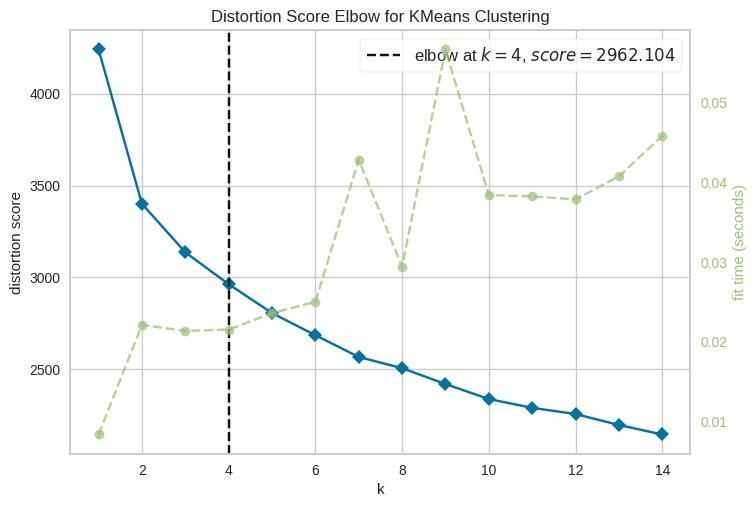

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

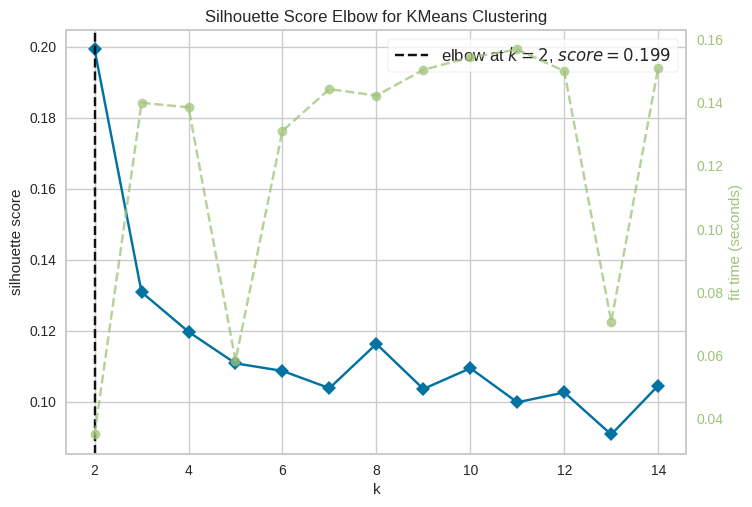

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

In [33]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=2, random_state=1)

In [34]:
#Prediction
y_kmeans=kmeans.predict(k_means_df)
y_kmeans

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [35]:
df1 = df.copy()

k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [36]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [37]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["num"].count().values
)

In [38]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,count_in_each_segment
KM_segments,,,,,,,,,,,,,,,
0,57.495495,0.828829,3.801802,135.045045,251.693694,0.180180,1.180180,132.954955,0.684685,1.920721,1.963964,1.252252,6.198198,2.180180,111
1,52.671875,0.593750,2.786458,129.750000,243.802083,0.130208,0.880208,159.234375,0.119792,0.530208,1.390625,0.322917,3.869792,0.218750,192


- Cluster 1 has the highest count(192) and thalach(132.954955).
- Cluster 0 has the highest age, sex distribution, cp, trestbps, chol, fbs, restecg, exang, oldpeak,slope, ca, thal and num.

In [39]:
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following are heart disease conditions present in patients:".format(cl))
    print(df1[df1["KM_segments"] == cl]["num"].unique())
    print()

In cluster 1, the following are heart disease conditions present in patients:
[0 1 2 3]

In cluster 0, the following are heart disease conditions present in patients:
[2 1 3 4 0]



In [40]:
for cl in df1["KM_segments"].unique():
    print(
        "The",
        df1[df1["KM_segments"] == cl]["num"].nunique(),
        "heart disease conditions present in cluster",
        cl,
        "are:",
    )
    print(df1[df1["KM_segments"] == cl]["num"].unique())
    print("-" * 100, "\n")

The 4 heart disease conditions present in cluster 1 are:
[0 1 2 3]
---------------------------------------------------------------------------------------------------- 

The 5 heart disease conditions present in cluster 0 are:
[2 1 3 4 0]
---------------------------------------------------------------------------------------------------- 



In [41]:
df1.groupby(["KM_segments", "sex"])['num'].count()

KM_segments  sex
0            0.0     19
             1.0     92
1            0.0     78
             1.0    114
Name: num, dtype: int64

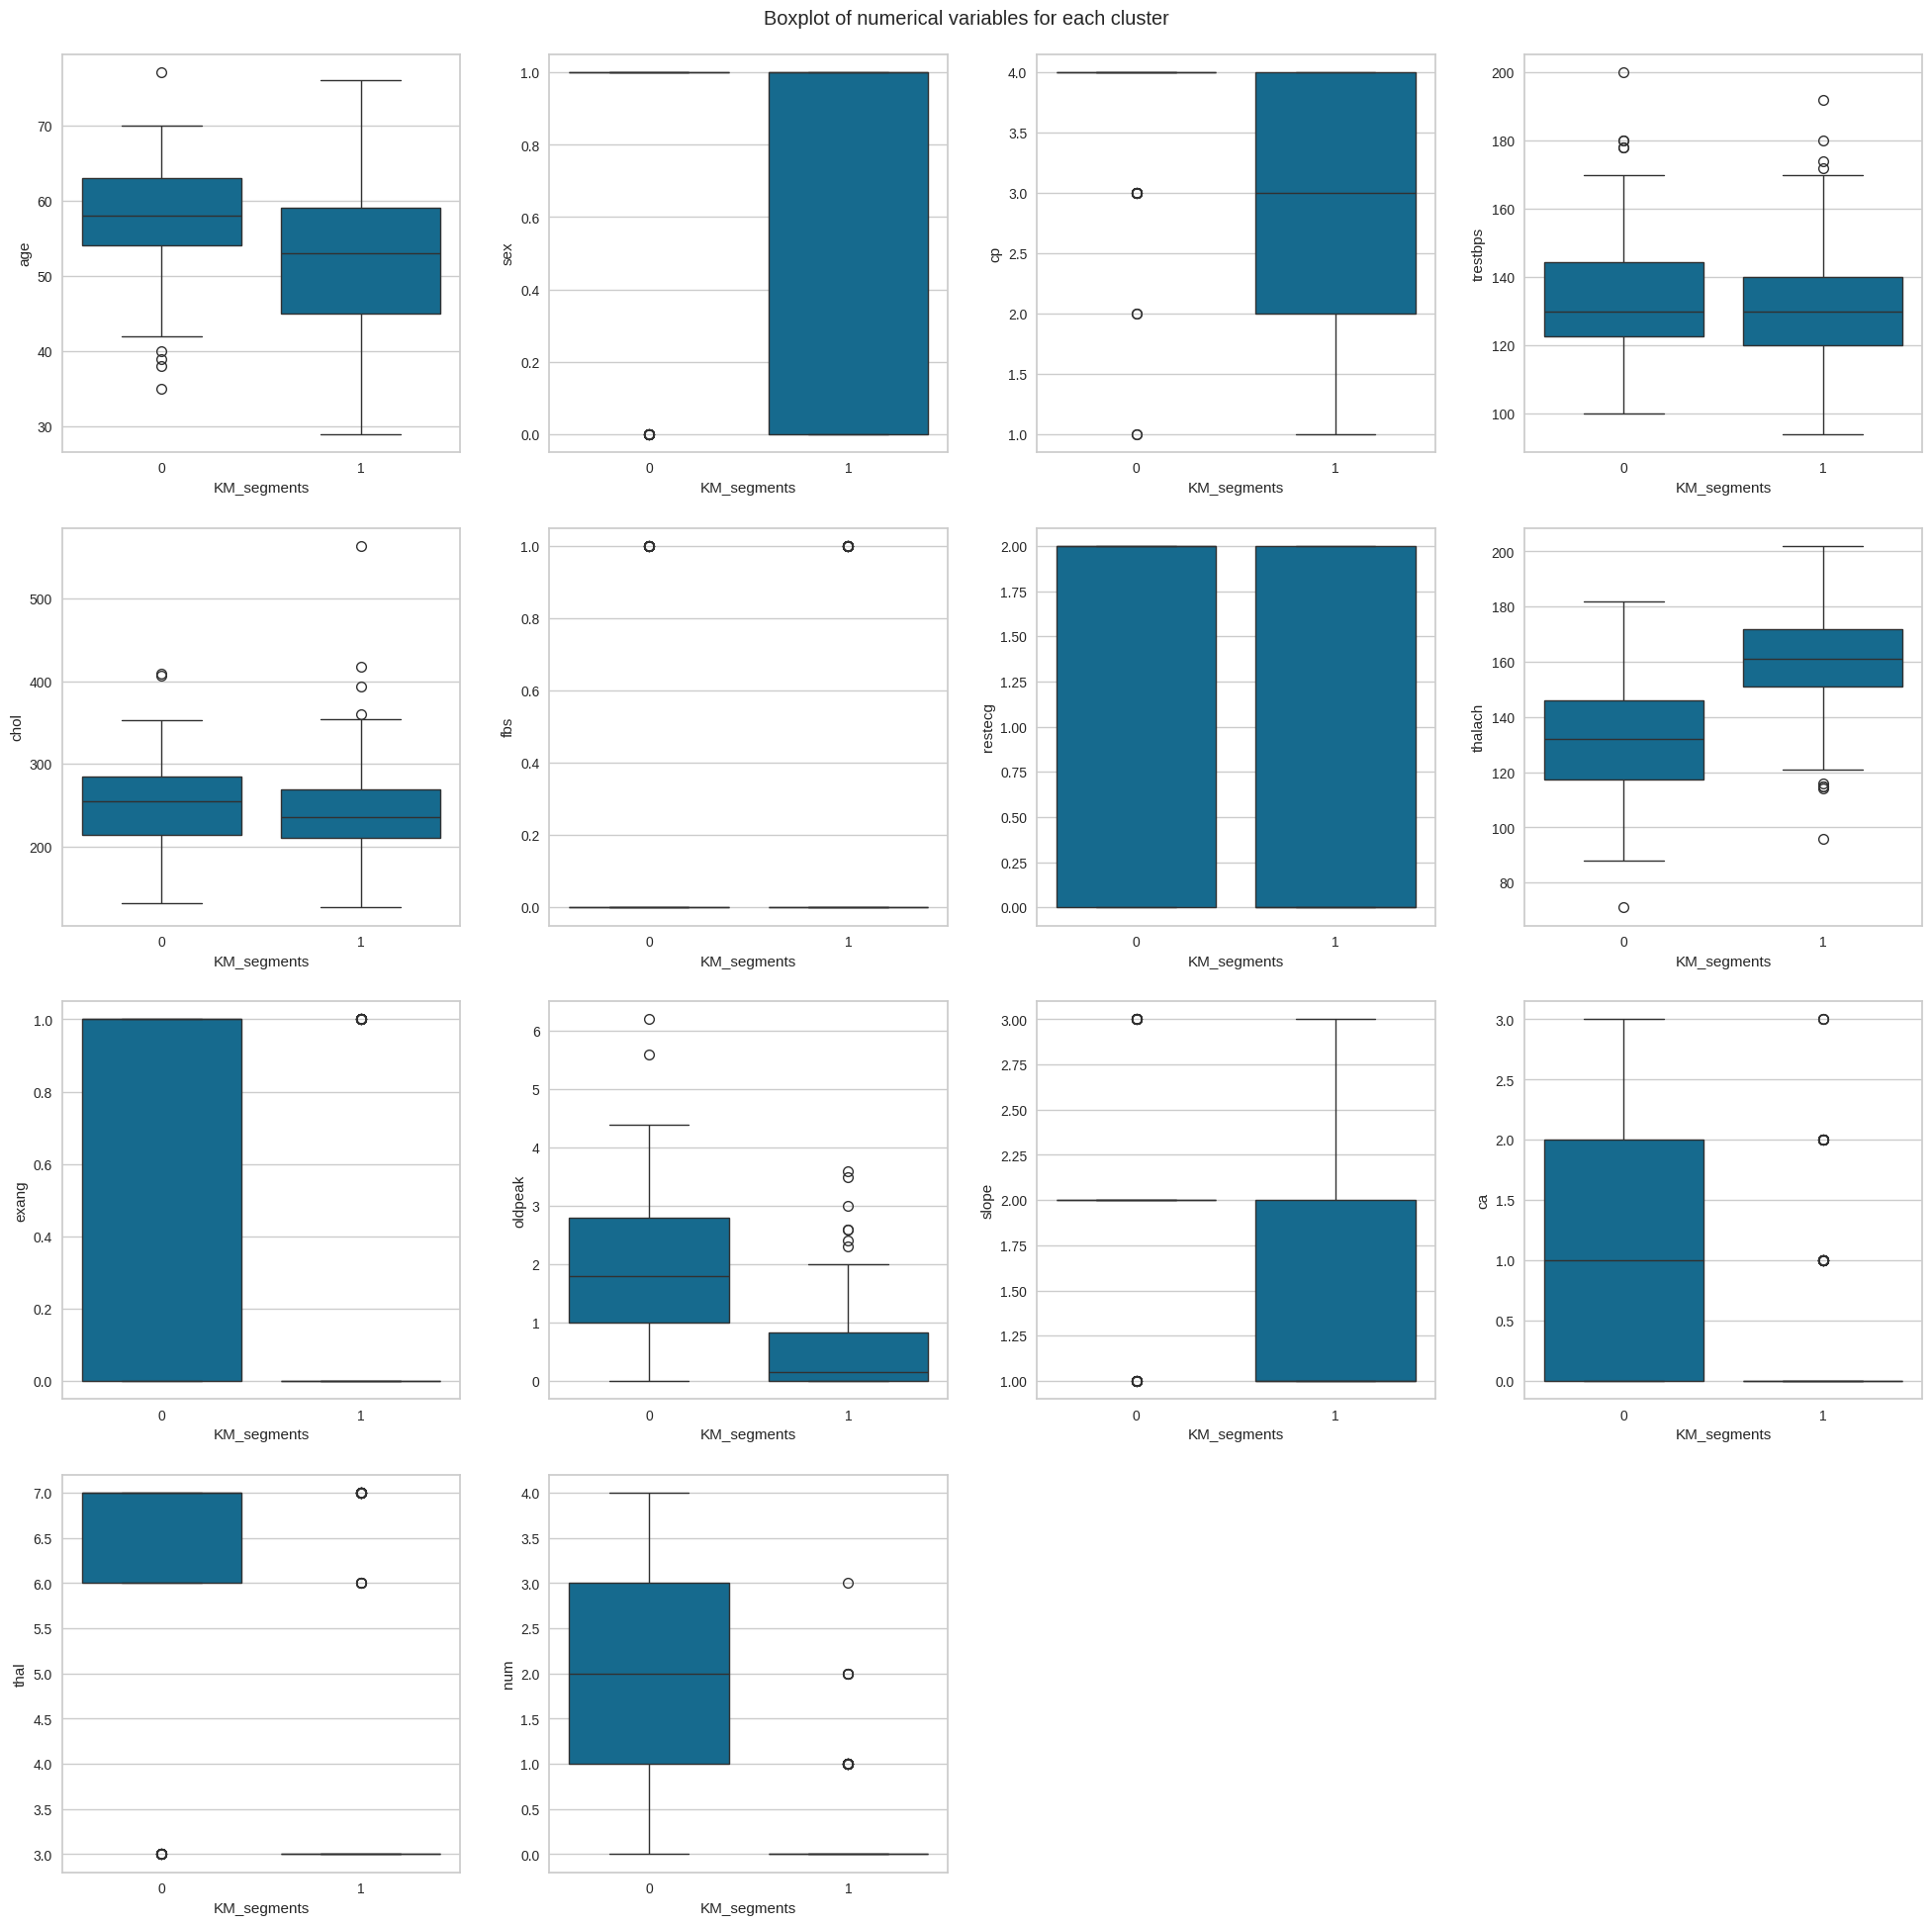

In [42]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

#### Let's compare Cluster vs sex

In [43]:
pd.crosstab(df1.KM_segments, df1.sex).style.highlight_max(
    color="lightgreen", axis=0
)

sex,0.000000,1.000000
KM_segments,,
0,19,92
1,78,114


<Axes: xlabel='KM_segments'>

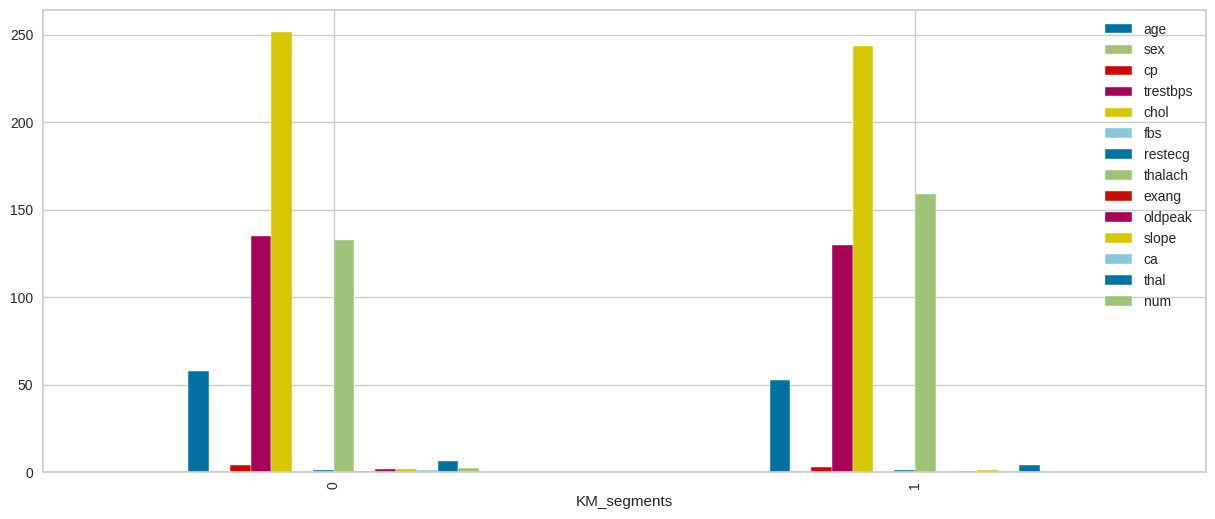

In [44]:
df1.groupby("KM_segments").mean().plot.bar(figsize=(15, 6))

- There are three main factors that guides heart disease conditions in our K-means clustering namely:
    - Oldpeak.
    - chol.
    - thalach.
- chol is the highest in both clusters 0 and 1.

# General Visualization Of The Clusters Using Scatters

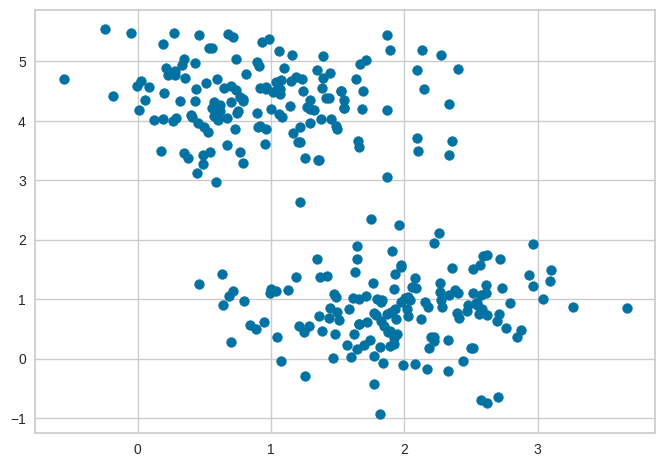

In [45]:

from sklearn.datasets import make_blobs
k_means_df,y_true=make_blobs(n_samples=303,centers=2,
                                  cluster_std=0.60,random_state=0)
plt.scatter(k_means_df[:,0],k_means_df[:,1],s=50);

- The visualization shows our two clusters with no centroids

# General Visualization Of The Clusters Using Scatters With The Centroids

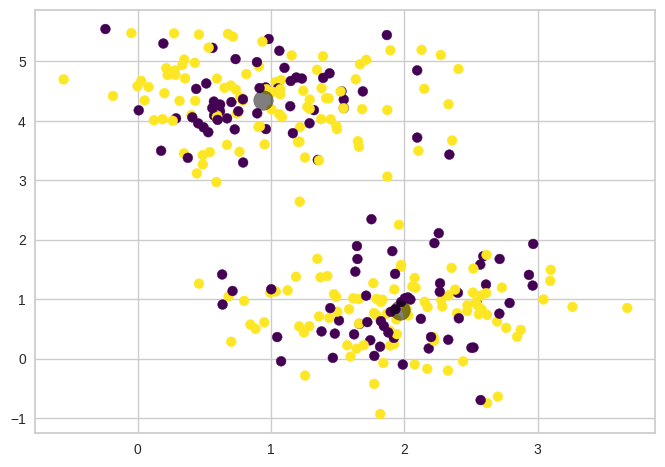

In [46]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(k_means_df,n_clusters,rseed=2):
    #Randomly choose clusters
    rng=np.random.RandomState(rseed)
    i=rng.permutation(k_means_df.shape[0])[:n_clusters]
    centers=k_means_df[i]
    while True:
        #Assign labels based on closest center
        labels=pairwise_distances_argmin(k_means_df,centers)
        #Find new centers from means of point
        new_centers=np.array([k_means_df[labels==i].mean(0)
                             for i in range(n_clusters)])
        #Check for convergence
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers,labels
centers,labels=find_clusters(k_means_df,2)
plt.scatter(k_means_df[:,0],k_means_df[:,1],c=y_kmeans,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);


- The visualization shows our two clusters with centroids

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [47]:
hc_df = subset_scaled_df.copy()

In [48]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.6071008675003935.
Cophenetic correlation for Euclidean distance and complete linkage is 0.5582668607745197.
Cophenetic correlation for Euclidean distance and average linkage is 0.675945071577591.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6521768792206172.
Cophenetic correlation for Chebyshev distance and single linkage is 0.49009211157653065.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.4820030692726946.
Cophenetic correlation for Chebyshev distance and average linkage is 0.6225359059133458.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5558792405563485.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5967244743270967.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3507593596148009.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6157616051621564.
Cophenetic co

**Let's explore different linkage methods with Euclidean distance only.**

In [49]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.6071008675003935.
Cophenetic correlation for complete linkage is 0.5582668607745197.
Cophenetic correlation for average linkage is 0.675945071577591.
Cophenetic correlation for centroid linkage is 0.6137002271402154.
Cophenetic correlation for ward linkage is 0.5403205242601072.
Cophenetic correlation for weighted linkage is 0.6521768792206172.
****************************************************************************************************
Highest cophenetic correlation is 0.675945071577591, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

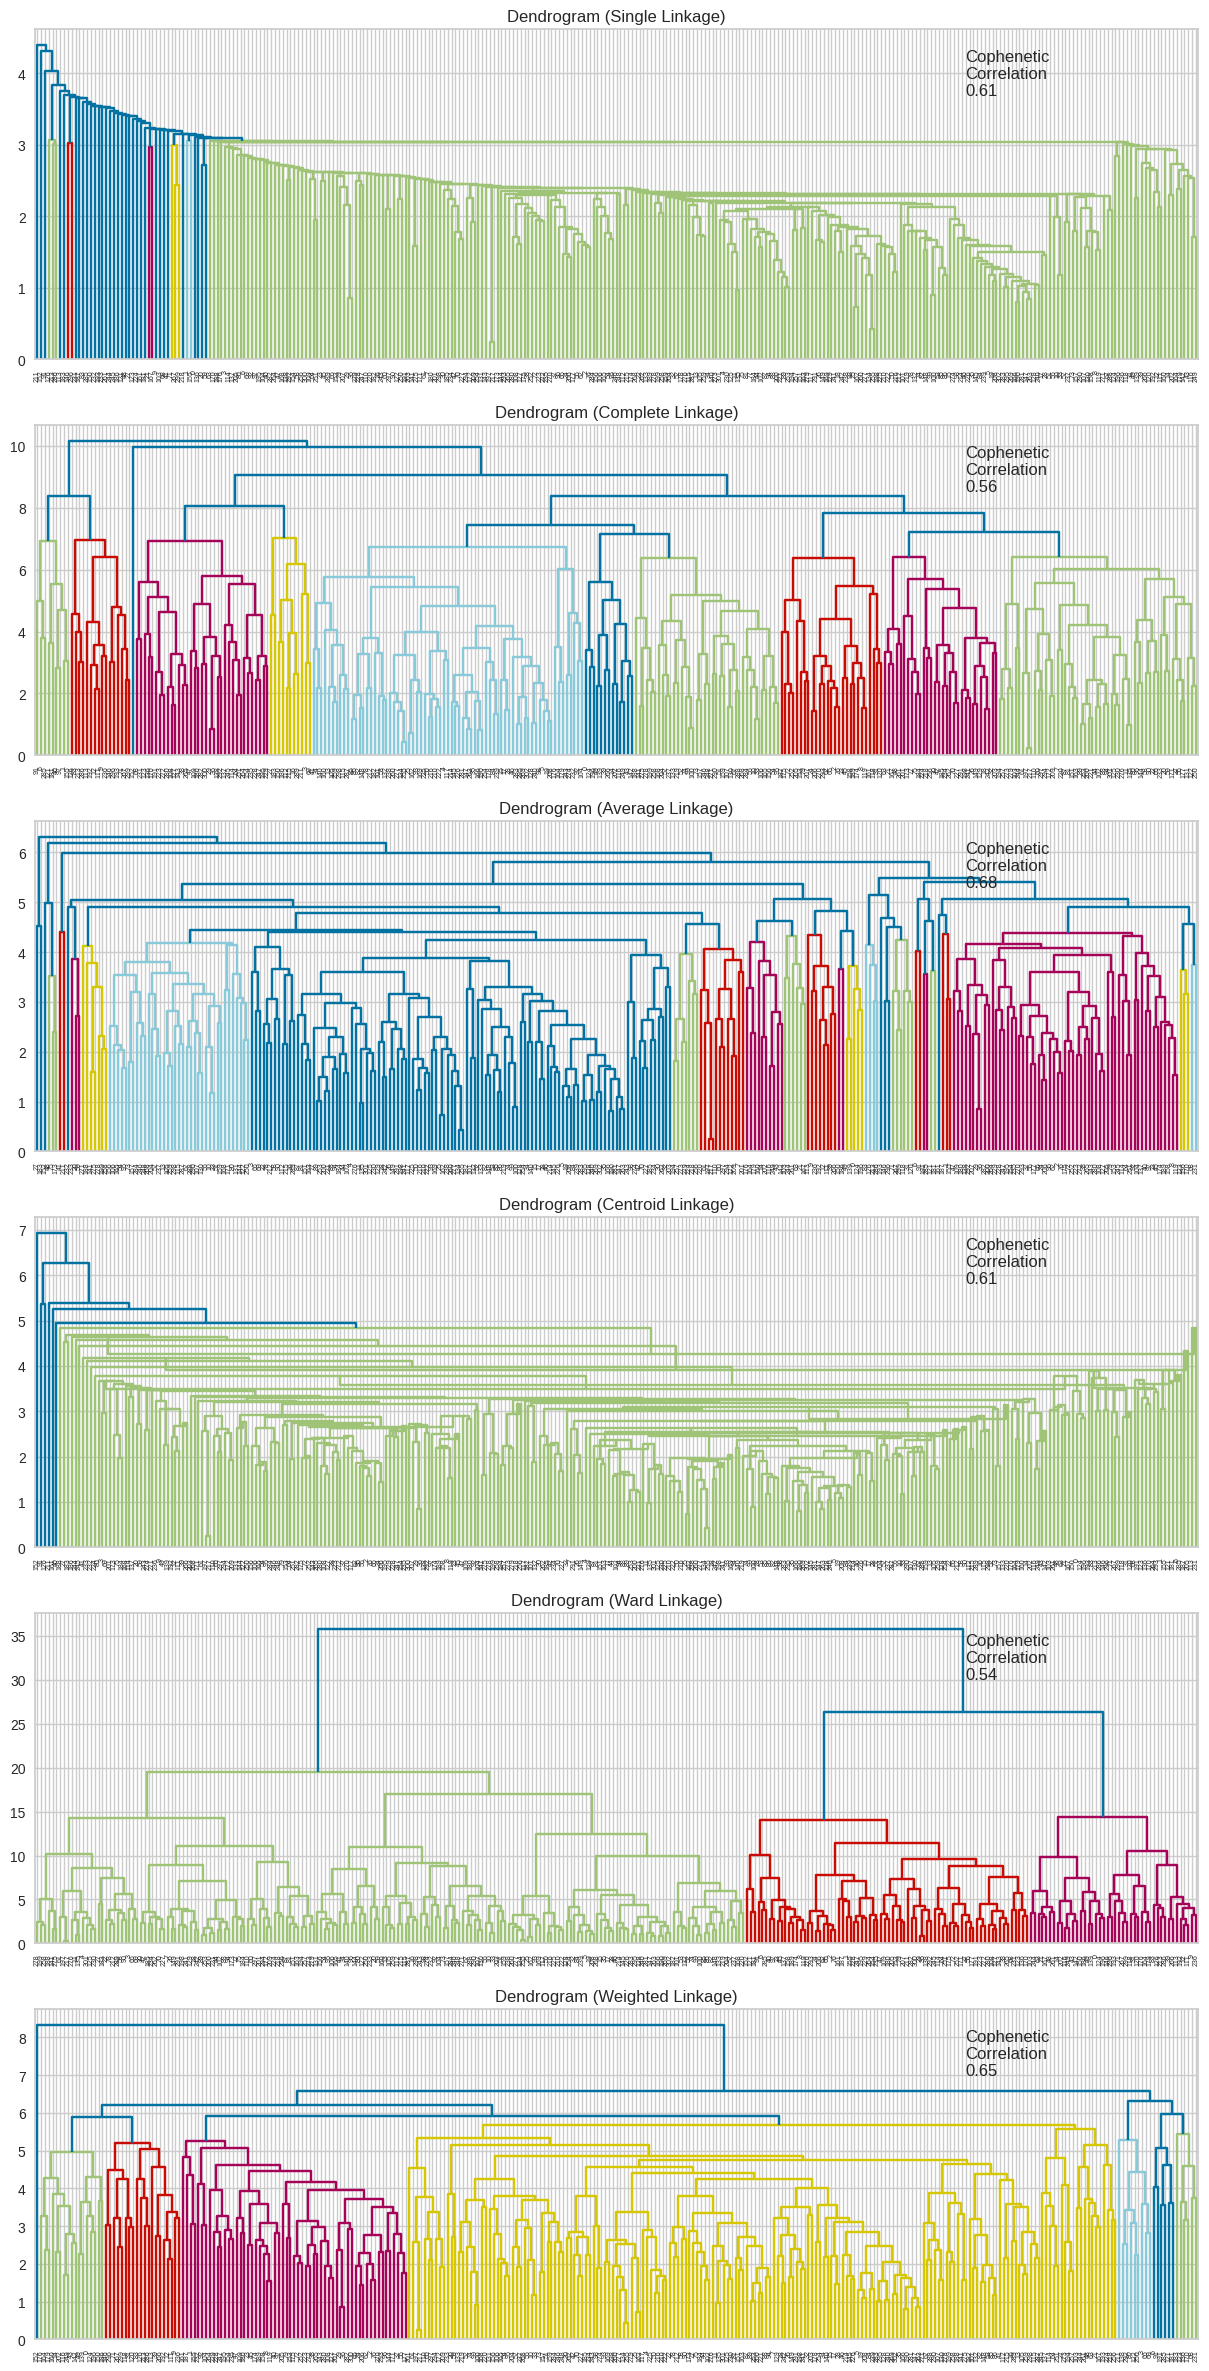

In [50]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [51]:
#  comparing cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.540321
1,complete,0.558267
0,single,0.607101
3,centroid,0.613700
5,weighted,0.652177
2,average,0.675945


### Creating model using sklearn

In [52]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [53]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [54]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [55]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["num"].count().values)

In [56]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,count_in_each_segment
HC_segments,,,,,,,,,,,,,,,
0,54.349153,0.688136,3.186441,131.386441,244.362712,0.149153,0.983051,149.447458,0.328814,1.012203,1.593220,0.677966,4.715254,0.949153,295
1,62.500000,0.500000,1.000000,164.000000,248.000000,0.000000,1.000000,129.500000,0.000000,3.400000,3.000000,0.000000,5.000000,0.000000,2
2,64.750000,0.000000,3.250000,138.750000,433.750000,0.250000,2.000000,156.250000,0.000000,1.100000,1.500000,0.250000,4.000000,0.000000,4
3,39.000000,1.000000,1.000000,130.000000,215.000000,0.000000,0.000000,180.000000,1.000000,2.600000,1.500000,0.000000,7.000000,2.000000,2


- Cluster 0 has the highest count(295)and restecg.
- Cluster 1 has the highest trestbps, oldpeak and slope.
- Cluster 2 has the highest age distribution, cp, chol, fbs and restecg
- Cluster 3 has the highest sex distribution, thalach, exang, thal and num.

<Axes: xlabel='HC_segments'>

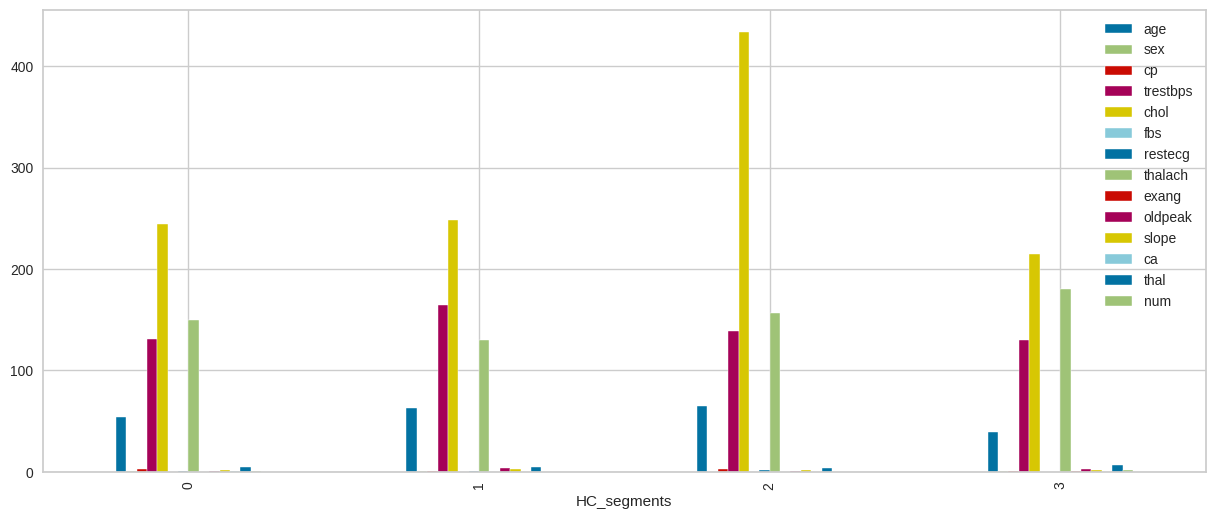

In [57]:
df2.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

- There are three main factors that guides heart disease conditions in our Hierarchical clustering namely:
    - Oldpeak.
    - chol.
    - thalach.
- chol is the highest in both clusters 0,1,2 and 3.

In [58]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following are heart disease conditions present in patients:".format(cl))
    print(df2[df2["HC_segments"] == cl]["num"].unique())
    print()

In cluster 0, the following are heart disease conditions present in patients:
[0 2 1 3 4]

In cluster 1, the following are heart disease conditions present in patients:
[0]

In cluster 3, the following are heart disease conditions present in patients:
[0 4]

In cluster 2, the following are heart disease conditions present in patients:
[0]



In [59]:
for cl in df2["HC_segments"].unique():
    print(
        "The",
        df2[df2["HC_segments"] == cl]["num"].nunique(),
        "heart disease conditions present in cluster",
        cl,
        "are:",
    )
    print(df2[df2["HC_segments"] == cl]["num"].unique())
    print("-" * 100, "\n")

The 5 heart disease conditions present in cluster 0 are:
[0 2 1 3 4]
---------------------------------------------------------------------------------------------------- 

The 1 heart disease conditions present in cluster 1 are:
[0]
---------------------------------------------------------------------------------------------------- 

The 2 heart disease conditions present in cluster 3 are:
[0 4]
---------------------------------------------------------------------------------------------------- 

The 1 heart disease conditions present in cluster 2 are:
[0]
---------------------------------------------------------------------------------------------------- 



In [60]:
df2.groupby(["HC_segments", "sex"])['num'].count()

HC_segments  sex
0            0.0     92
             1.0    203
1            0.0      1
             1.0      1
2            0.0      4
3            1.0      2
Name: num, dtype: int64

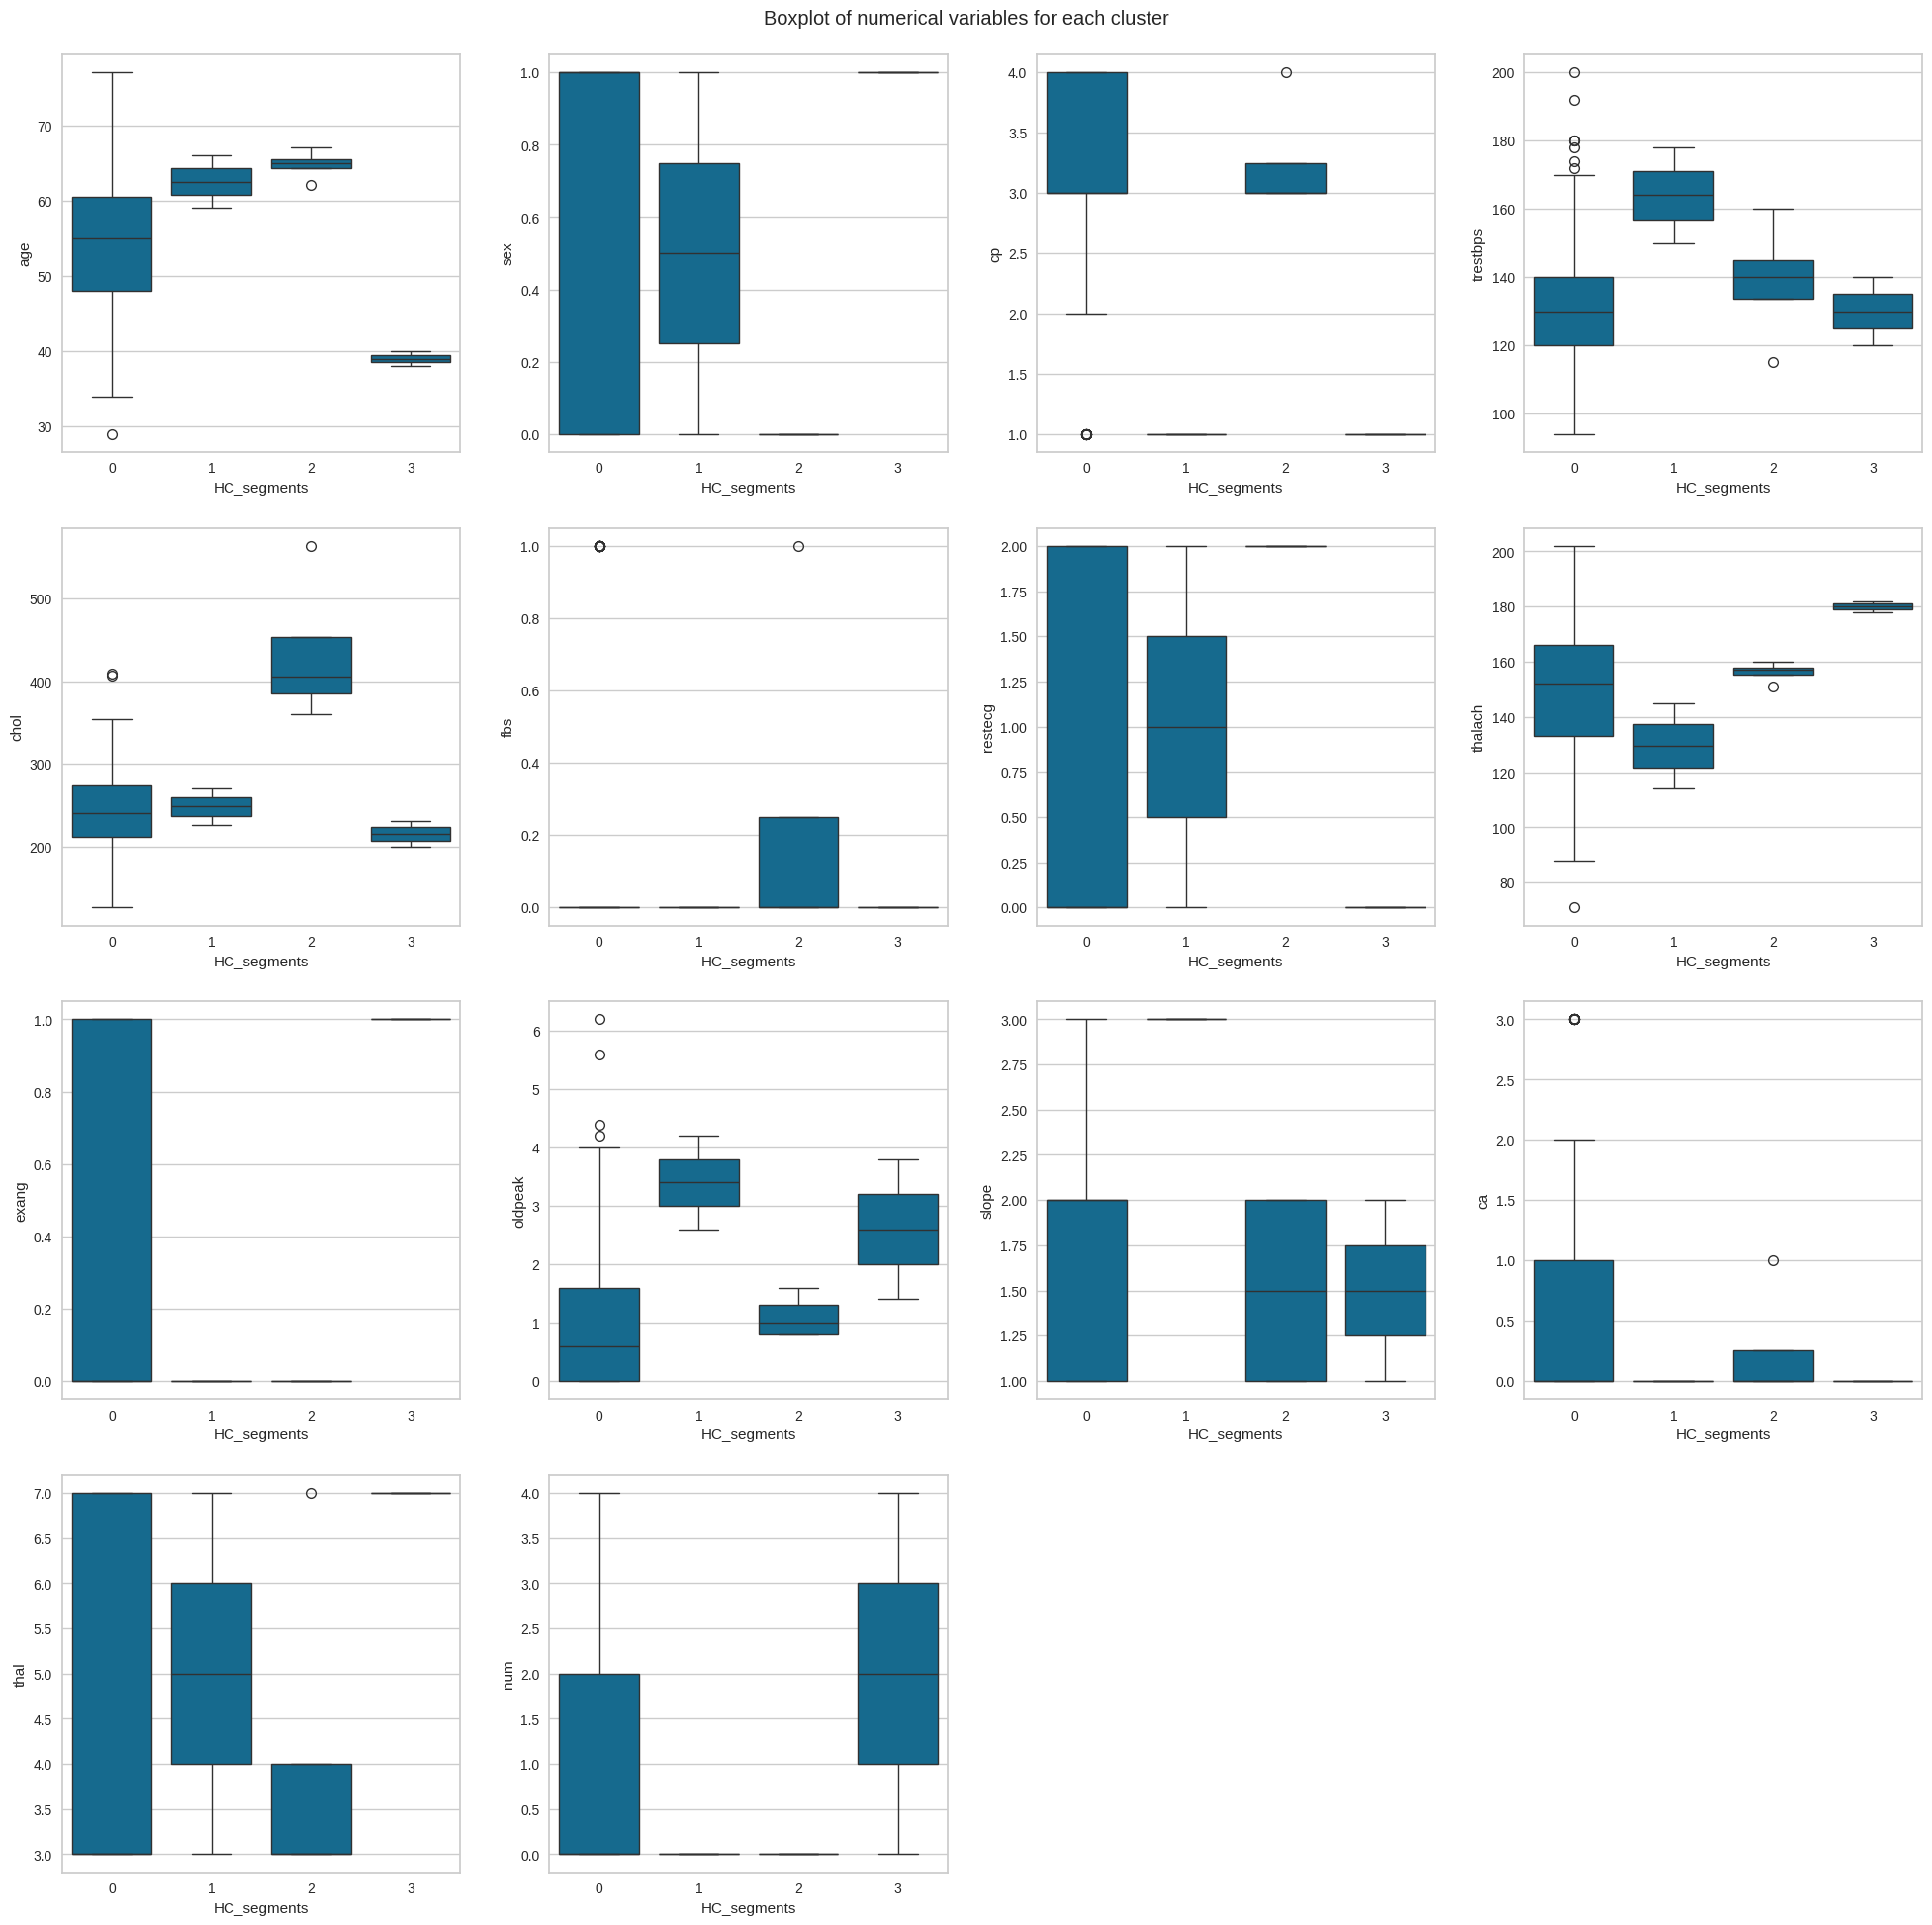

In [61]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## Execution Time By K-Means Clustering

In [62]:
%timeit [KMeans(n_clusters=2, random_state=1)]


2.55 µs ± 95.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Execution Time By Hierarchical Clustering

In [63]:
%timeit [AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")]

1.01 µs ± 16.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## K-means vs Hierarchical Clustering

- Hierarchical Clustering  took less time in it execution as compared to K-Means clustering, this means it is computationally faster than K-Means clustering.
- Hierarchical clustering gave more distinct clusters as it is easier to determine the number of clusters by hierarchical clustering's dendrogram.
- In K-means cluster 0 had 111 observations while in hierarchical clustering it had 295.
- In K-means cluster 1 had 192 observations while in hierarchical clustering it had 2.
- There were 4 clusters obtained in hierarchical clustering while 2 clusters K-means clustering.
- In Hierarchical Clustering patients in cluster 3 and have got low risky of contracting heart disease due to low cholestrol level while in K-Means clustering patients in both clusters 0 and 1 have got highest risk of contracting heart disease.

## Actionable Insights and Recommendations

- We will deploy Hierarchical Clustering to get insights of heart disease conditions since it is computationally faster than K-Means clustering.
- Cholestrol level is the major determinant in determining heart disease conditions of the patients.
- Cluster 0 patients are the ones that will give accurate results due to reasonable sample size of 295 which is the highest while clusters 1 and 3 are the worst due to its very small sample size of 2. 


___